# 1.1 First NGSolve example

Let us solve the Poisson problem of finding $u$ satisfying 

$$
\begin{aligned}
-\Delta u & = f && \text { in  the unit square},
\\
u & = 0 && \text{ on the boundary}
\end{aligned}
$$
$$f(x,y)=sin(\pi x) sin(\pi y)$$
$$u_{exact}=\frac{1}{2\pi^2}\cdot sin(\pi x) sin(\pi y) $$

## Quick steps to solution:

#### 1. Import NGSolve and Netgen Python modules:

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw

#### 2. Generate an unstructured mesh

#### Utiliza la funcionalidad de NGSolve para generar una malla para el dominio del cuadrado unitario

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))
mesh.nv, mesh.ne   # number of vertices & elements 

(137, 232)

# 137: Representa el número de vértices en la malla generada para el cuadrado unitario.
# 
232: Es el número de elementos en la malla, es decir, la cantidad de subdivisiones o subregiones en las que se divide el cuadrado unitario para formar la malla.

Here we prescribed a maximal mesh-size of 0.2 using the `maxh` flag. 

In [3]:
Draw(mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

#### 3. Declare a finite element space:

 Aquí se crea un espacio de funciones finitas sobre la malla mesh. El espacio de funciones finitas H1 representa funciones que son continuas y tienen derivadas en $L^2$ 2
  (es decir, sus gradientes están en el espacio de funciones cuadrado-integrables). Este espacio se define sobre la malla mesh. El parámetro order=1 especifica el grado de las funciones (en este caso, funciones lineales), y dirichlet="bottom|right" parece estar indicando que las condiciones de Dirichlet se aplican en los bordes inferiores y derechos de la mal# la.

fes.ndof: Esto devuelve el número de grados de libertad (dof, por sus siglas en inglés "degrees of freedom") en este espacio de funciones finitas. Los grados de libertad son esencialmente el número de incógnitas (número de funciones lineales independientes) en el espacio de funciones finitas. Esto incluiría el número de puntos de interpolación en los elementos de la malla y los grados de libertad restringidos por las condiciones de contorno.

In [16]:
fes = H1(mesh, order=3, dirichlet="bottom|right|top|left")
fes.ndof  # number of unknowns in this space

1105

# indica que hay 1105 grados de libertad en el espacio de funciones finitas que se ha definido.

Python's help system displays further documentation.

In [5]:
help(fes)

Help on H1 in module ngsolve.comp object:

class H1(FESpace)
 |  An H1-conforming finite element space.
 |
 |  The H1 finite element space consists of continuous and
 |  element-wise polynomial functions. It uses a hierarchical (=modal)
 |  basis built from integrated Legendre polynomials on tensor-product elements,
 |  and Jaboci polynomials on simplicial elements.
 |
 |  Boundary values are well defined. The function can be used directly on the
 |  boundary, using the trace operator is optional.
 |
 |  The H1 space supports variable order, which can be set individually for edges,
 |  faces and cells.
 |
 |  Internal degrees of freedom are declared as local dofs and are eliminated
 |  if static condensation is on.
 |
 |  The wirebasket consists of all vertex dofs. Optionally, one can include the
 |  first (the quadratic bubble) edge basis function, or all edge basis functions
 |  into the wirebasket.
 |
 |  Keyword arguments can be:
 |
 |  order: int = 1
 |    order of finite element 

#### 4. Declare test function, trial function, and grid function 

* Test and trial function are symbolic objects - called `ProxyFunctions` -  that help you construct bilinear forms (and have no space to hold solutions). 

* `GridFunctions`, on the other hand, represent functions in the finite element space and contains memory to hold coefficient vectors.

# u = fes.TrialFunction(): Aquí se define un objeto simbólico u que representa la "función de ensayo" (trial function) en el espacio de funciones finitas fes. La función de ensayo es una función que se utiliza para buscar la solución de la ecuación diferencial en el método de elementos finitos. En esencia, u será la función desconocida que se intentará encontrar para resolver el problema.
# 
v = fes.TestFunction(): De manera similar, se define un objeto simbólico v que representa la "función de test" (test function) en el espacio de funciones finitas fes. La función de test se utiliza en la formulación variacional de la ecuación diferencial para probar la solución propuesta por la función de ensayo. Esta función de test será utilizada en el proceso de resolver la ecuación diferencial por el método de elementos finitos.# 

gfu = GridFunction(fes): Aquí se crea un objeto gfu del tipo GridFunction asociado al espacio de funciones finitas fes. Este objeto gfu será utilizado para almacenar la solución numérica de la ecuación diferencial en la malla. Es decir, contendrá la func 
�
u que satisface la ecuación Poisson sobre la malla.

In [6]:
u = fes.TrialFunction()  # symbolic object
v = fes.TestFunction()   # symbolic object
gfu = GridFunction(fes)  # solution 

Alternately, you can get both the trial and test variables at once:

# TnT Función de aproximación (trial and test) test: función de ponderación

In [7]:
u, v = fes.TnT()

#### 5. Define and assemble linear and bilinear forms:

# a = BilinearForm(fes): Aquí se crea un objeto a del tipo BilinearForm, asociado al espacio de funciones finitas fes. Un BilinearForm se utiliza para representar la forma bilineal asociada al problema. En el contexto de la ecuación de Poisson, la forma bilineal suele involucrar términos que contienen derivadas de la función de ensayo (u) y la función de test (v).
# 
a += grad(u)*grad(v)*dx: Se definen los términos de la forma bilineal. grad(u) y grad(v) representan los gradientes de las funciones u y v, respectivamente. En el problema de Poisson, grad(u) y grad(v) se utilizan para representar las derivadas espaciales de las funciones de ensayo y de test. El término dx indica la integración sobre el dominio.# 

a.Assemble(): Después de definir los términos de la forma bilineal, se utiliza el método Assemble() para ensamblar la matriz asociada a a. Esto implica la evaluación numérica de la integral sobre la malla para obtener la representación matricial de la forma bilinea# l.

f = LinearForm(fes): Similar a la BilinearForm, se crea un objeto f del tipo LinearForm, asociado al espacio de funciones finitas fes. El LinearForm se utiliza para representar la forma lineal asociada al problema. En el contexto de la ecuación de Poisson, la forma lineal suele contener términos lineales en la función de test (v) y posiblemente en las funciones fuente o términos forzantes del probl# ema.

f += x*v*dx: Se definen los términos de la forma lineal. x podría representar un campo escalar (como la función fuente o un término forzante del problema). v es la función de test. dx indica la integración sobre el do# minio.

f.Assemble(): Al igual que con la forma bilineal, el método Assemble() se utiliza para ensamblar la representación numérica de la forma lineal f

In [8]:
a = BilinearForm(fes)
a += grad(u)*grad(v)*dx
a.Assemble()

f = LinearForm(fes)
f += sin(pi*x)*sin(pi*y)*v*dx
f.Assemble();

Alternately, we can do one-liners: 

In [9]:
a = BilinearForm(grad(u)*grad(v)*dx).Assemble()
f = LinearForm(sin(pi*x)*sin(pi*y)*v*dx).Assemble()

You can examine the linear system in more detail:

#### 6. Solve the system:

In [10]:
gfu.vec.data = \
    a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec
Draw(gfu);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

The Dirichlet boundary condition constrains some degrees of freedom. The argument `fes.FreeDofs()` indicates that only the remaining "free" degrees of freedom should participate in the linear solve.

You can examine the coefficient vector of solution if needed:

You can see the zeros coming from the zero boundary conditions.

In [11]:
error = sqrt(Integrate((gfu - sin(pi*x)*sin(pi*y)/(2*pi**2))**2*dx, mesh))/sqrt(Integrate((sin(pi*x)*sin(pi*y)/(2*pi**2))**2*dx, mesh))

In [12]:
print(error) #este es el error relativo entre la solución numerica y la solución exacta

8.182320358154867e-06


In [13]:
h=[]; errores=[];
h.append(0.4);
errores.append(0.0015995016686720191) #este es para orden 3
h.append(0.2);
errores.append(0.00017480624822893877)
h.append(0.1);
errores.append(8.182320358154867e-06)
h.append(0.05);
errores.append(4.0878775002805817e-07)

(1e-06, 0.1)

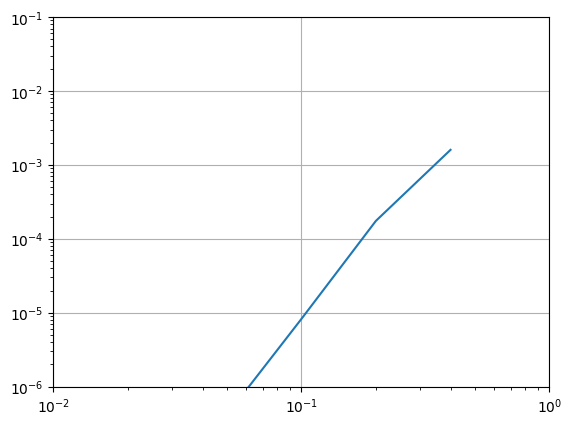

In [14]:
from matplotlib import pyplot as plt
plt.loglog(h,errores)
plt.grid(True)
plt.xlim([1e-2,1e0])
plt.ylim([1e-6,1e-1])

In [15]:
import numpy as np
convergencia = (np.log (errores[-1])-np.log(errores[-2]))/ (np.log(h[-1]) - np.log(h[-2]))
print(convergencia)

4.32308615402855


Este orden de convergencia depende del grado del polinomio del espacio de elementos finitos utilizado, para este caso de polinomios de grado 3 el orden teórico esperado es 3+1 es decir 4 lo cual es similar al resultado observado.

Repetir este procedimiento cambiando h, orden del espacio de elementos finitos 2 y 3, hasta 0.05

## Ways to interact with NGSolve

* A jupyter notebook (like this one) gives you one way to interact with NGSolve. When you have a complex sequence of tasks to perform, the notebook may not be adequate.


* You can write an entire python module in a text editor and call python on the command line. (A script of the above is provided in `poisson.py`.)
    ```
    python3 poisson.py
    ```
  
* If you want the Netgen GUI, then use `netgen` on the command line:
    ```
    netgen poisson.py
    ```
  You can then ask for a python shell from the GUI's menu options (`Solve -> Python shell`).
  